<a href="https://colab.research.google.com/github/shambhavisud/Workforce-Preservation/blob/main/Workforce_Preservation_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES AND DATASETS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
#drive.mount('/content/drive/')
#employee_df = pd.read_csv('/content/drive/My Drive/Human_Resources.csv')
employee_df = pd.read_csv('/content/Human_Resources.csv')
pd.set_option('display.max_columns',None)
employee_df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [ ]:
employee_df.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
employee_df.info()
# 35 features in total, each contains 1470 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

# **VISUALIZE DATASET**

In [ ]:
# Replacing 'Attritition' and 'overtime' column with integers before performing any visualizations
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)


In [ ]:
employee_df.head(4)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   

   MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  \
0        19479                   8       1         1                 11   
1        24907                   1       1         0                 23   
2         2396                   6       1         1                 15   
3        23159                   1       1         1                 11   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0

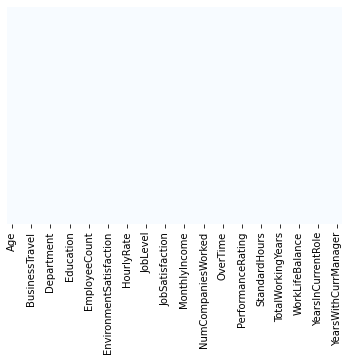

In [ ]:
# checking for null values
sns.heatmap(employee_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44138749d0>,
      dtype=object)

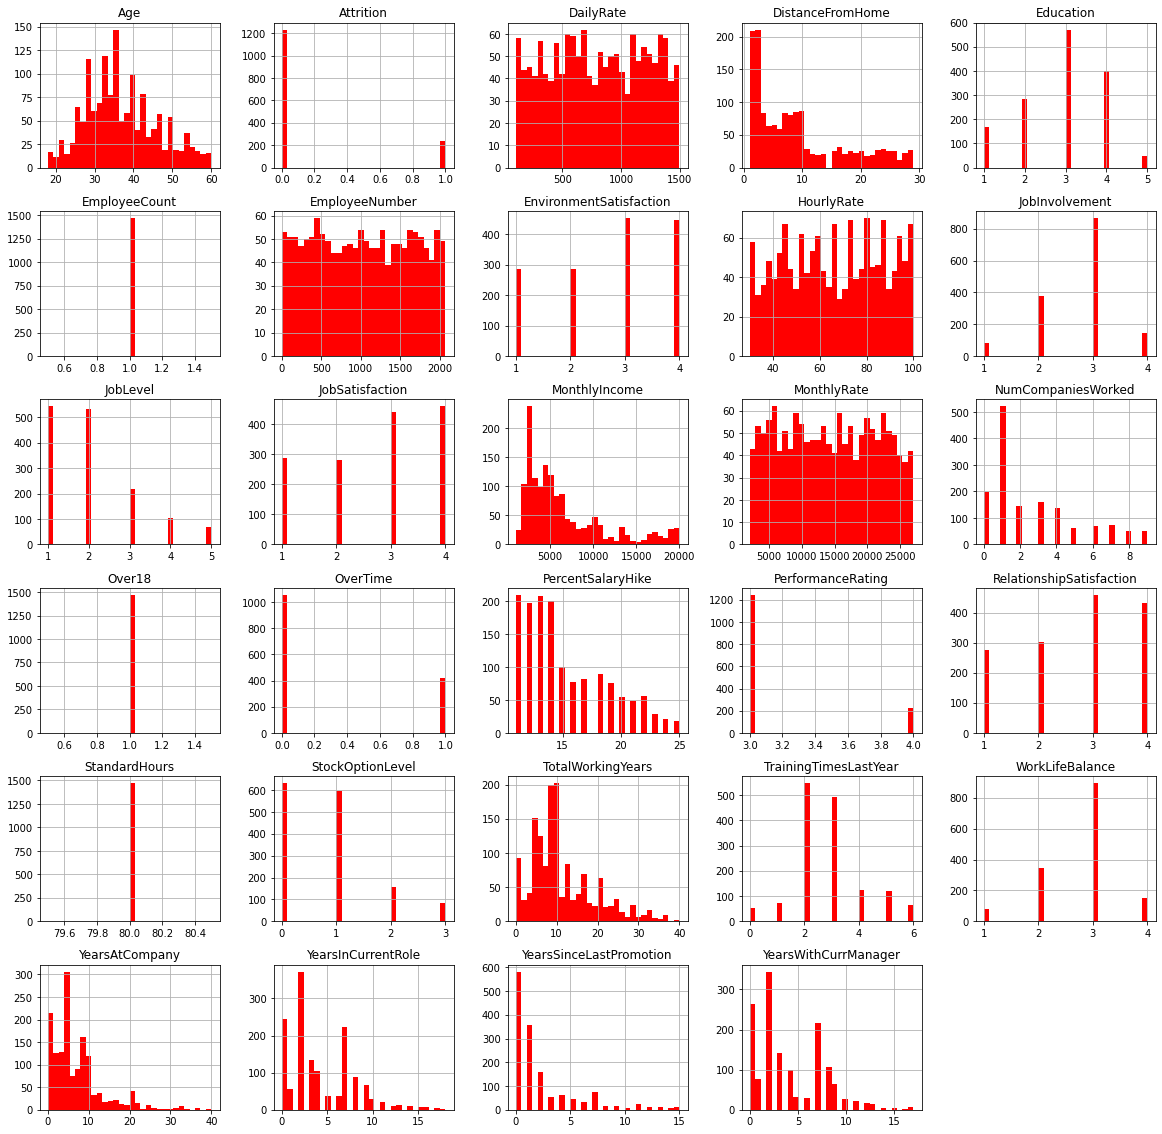

In [ ]:
#histograms for all the features
employee_df.hist(bins = 30, figsize = (20,20), color = 'r')

In [ ]:
# Drop 'EmployeeCount' , 'Standardhours','Over18' and'EmployeeNumber'  since they do not change from one employee to the other

employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [ ]:
# Let's see how many employees left the company! 
left_df        = employee_df[employee_df['Attrition'] == 1]
stayed_df      = employee_df[employee_df['Attrition'] == 0]


In [ ]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 

print("Total =", len(employee_df))

print("Number of employees who left the company =", len(left_df))
print("Percentage of employees who left the company =", 1.*len(left_df)/len(employee_df)*100.0, "%")
 
print("Number of employees who did not leave the company (stayed) =", len(stayed_df))
print("Percentage of employees who did not leave the company (stayed) =", 1.*len(stayed_df)/len(employee_df)*100.0, "%")

Total = 1470
Number of employees who left the company = 237
Percentage of employees who left the company = 16.122448979591837 %
Number of employees who did not leave the company (stayed) = 1233
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %


In [ ]:
left_df.describe()
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

Age  Attrition    DailyRate  DistanceFromHome   Education  \
count  237.000000      237.0   237.000000        237.000000  237.000000   
mean    33.607595        1.0   750.362869         10.632911    2.839662   
std      9.689350        0.0   401.899519          8.452525    1.008244   
min     18.000000        1.0   103.000000          1.000000    1.000000   
25%     28.000000        1.0   408.000000          3.000000    2.000000   
50%     32.000000        1.0   699.000000          9.000000    3.000000   
75%     39.000000        1.0  1092.000000         17.000000    4.000000   
max     58.000000        1.0  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count       237.000000     237.000000    237.000000          237.000000   
mean          2.468354    4787.092827  14559.308017            2.940928   
std           1.118058    3640.210367   7208.153264            2.678519   
min           1.000000    1009.000000   2326.000000            0.000000   
25%           1.000000    2373.000000   8870.000000            1.000000   
50%           3.000000    3202.000000  14618.000000            1.000000   
75%           3.000000    5916.000000  21081.000000            5.000000   
max           4.000000   19859.000000  26999.000000            9.000000   

         OverTime  PercentSalaryHike  PerformanceRating  \
count  237.000000         237.000000         237.000000   
mean     0.535865          15.097046           3.156118   
std      0.499768           3.770294           0.363735   
min      0.000000          11.000000           3.000000   
25%      0.000000          12.000000           3.000000   
50%      1.000000          14.000000           3.000000   
75%      1.000000          17.000000           3.000000   
max      1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count                237.000000        237.000000         237.000000   
mean                   2.599156          0.527426           8.244726   
std                    1.125437          0.856361           7.169204   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           3.000000   
50%                    3.000000          0.000000           7.000000   
75%                    4.000000          1.000000          10.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count             237.000000       237.000000      237.000000   
mean                2.624473         2.658228        5.130802   
std                 1.254784         0.816453        5.949984   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        1.000000   
50%                 2.000000         3.000000        3.000000   
75%                 3.000000         3.000000        7.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count          237.000000               237.000000            237.000000  
mean             2.902954                 1.945148              2.852321  
std

In [ ]:
stayed_df.describe()

Age  Attrition    DailyRate  DistanceFromHome    Education  \
count  1233.000000     1233.0  1233.000000       1233.000000  1233.000000   
mean     37.561233        0.0   812.504461          8.915653     2.927007   
std       8.888360        0.0   403.208379          8.012633     1.027002   
min      18.000000        0.0   102.000000          1.000000     1.000000   
25%      31.000000        0.0   477.000000          2.000000     2.000000   
50%      36.000000        0.0   817.000000          7.000000     3.000000   
75%      43.000000        0.0  1176.000000         13.000000     4.000000   
max      60.000000        0.0  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1233.000000    1233.000000   1233.000000          1233.00000   
mean          2.778589    6832.739659  14265.779400             2.64558   
std           1.093277    4818.208001   7102.260749             2.46009   
min           1.000000    1051.000000   2094.000000             0.00000   
25%           2.000000    3211.000000   7973.000000             1.00000   
50%           3.000000    5204.000000  14120.000000             2.00000   
75%           4.000000    8834.000000  20364.000000             4.00000   
max           4.000000   19999.000000  26997.000000             9.00000   

          OverTime  PercentSalaryHike  PerformanceRating  \
count  1233.000000        1233.000000        1233.000000   
mean      0.234388          15.231144           3.153285   
std       0.423787           3.639511           0.360408   
min       0.000000          11.000000           3.000000   
25%       0.000000          12.000000           3.000000   
50%       0.000000          14.000000           3.000000   
75%       0.000000          18.000000           3.000000   
max       1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1233.000000       1233.000000        1233.000000   
mean                   2.733982          0.845093          11.862936   
std                    1.071603          0.841985           7.760719   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          16.000000   
max                    4.000000          3.000000          38.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1233.000000      1233.000000     1233.000000   
mean                2.832928         2.781022        7.369019   
std                 1.293585         0.681907        6.096298   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        6.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1233.000000              1233.000000           1233.000000  
mean             4.484185         

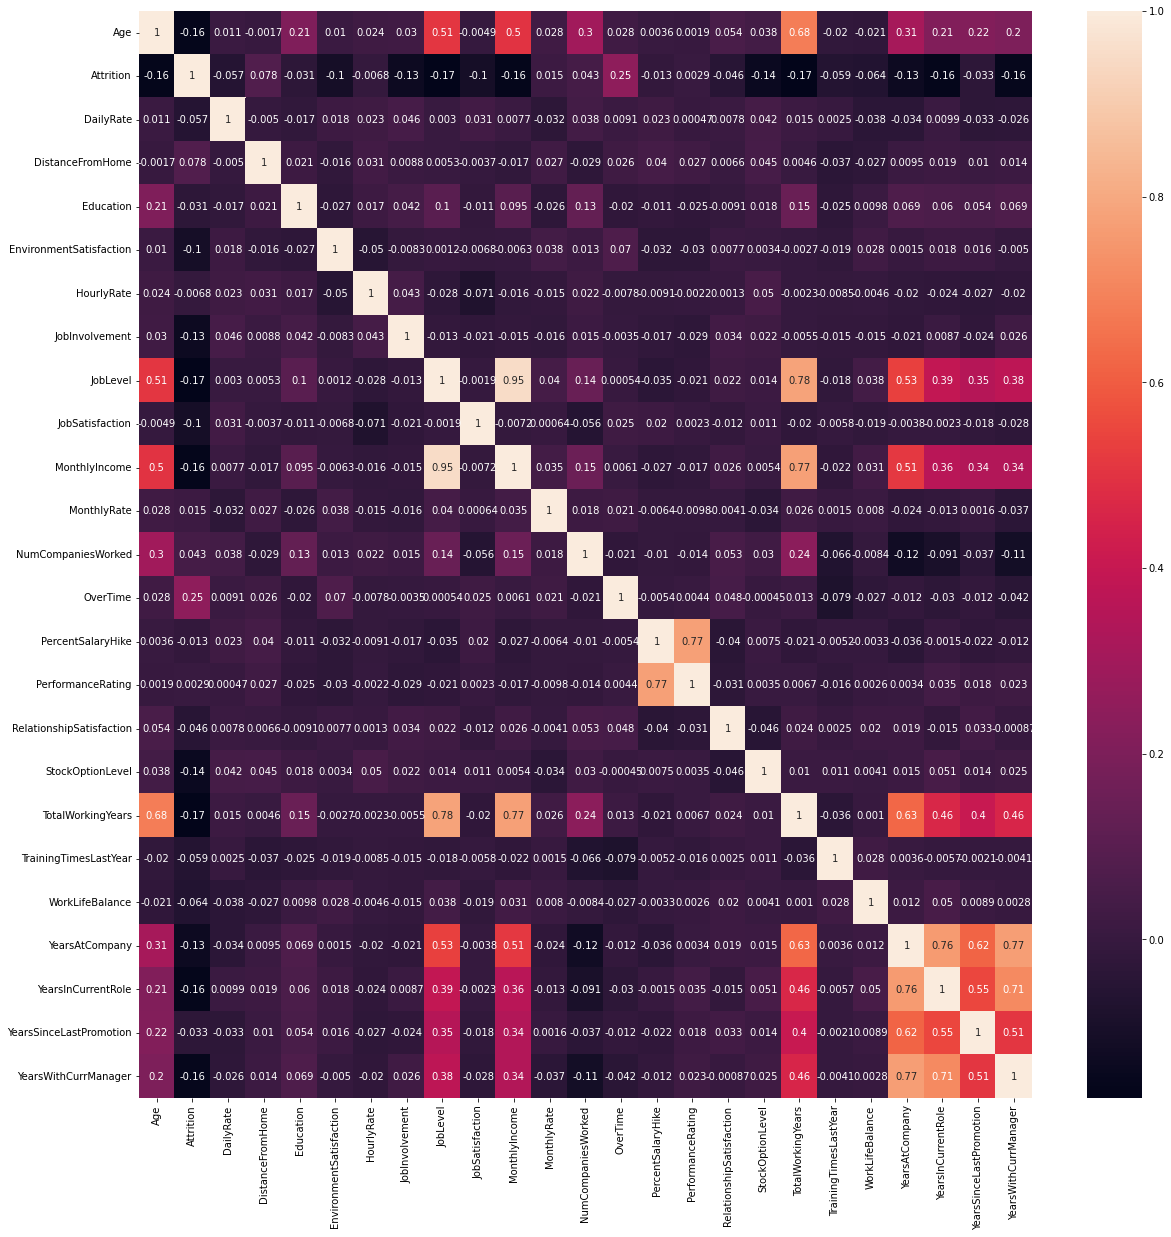

In [ ]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

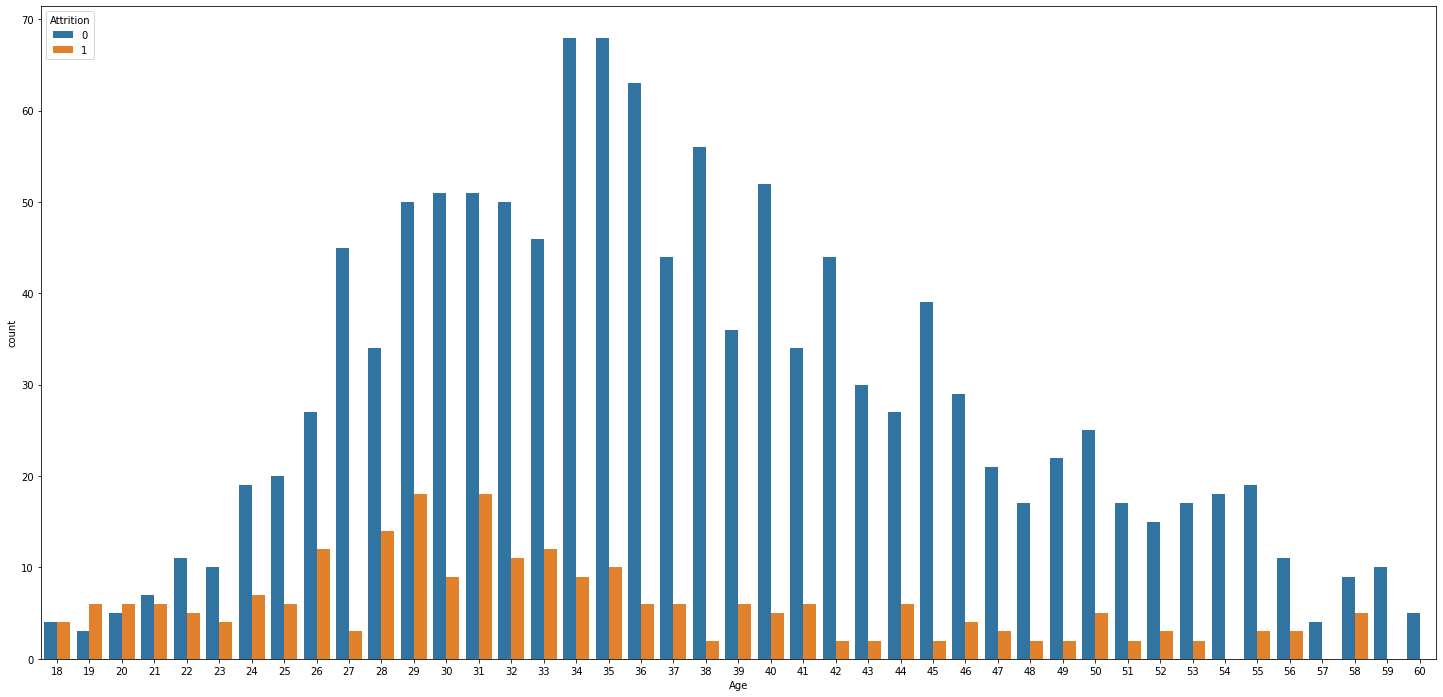

In [ ]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

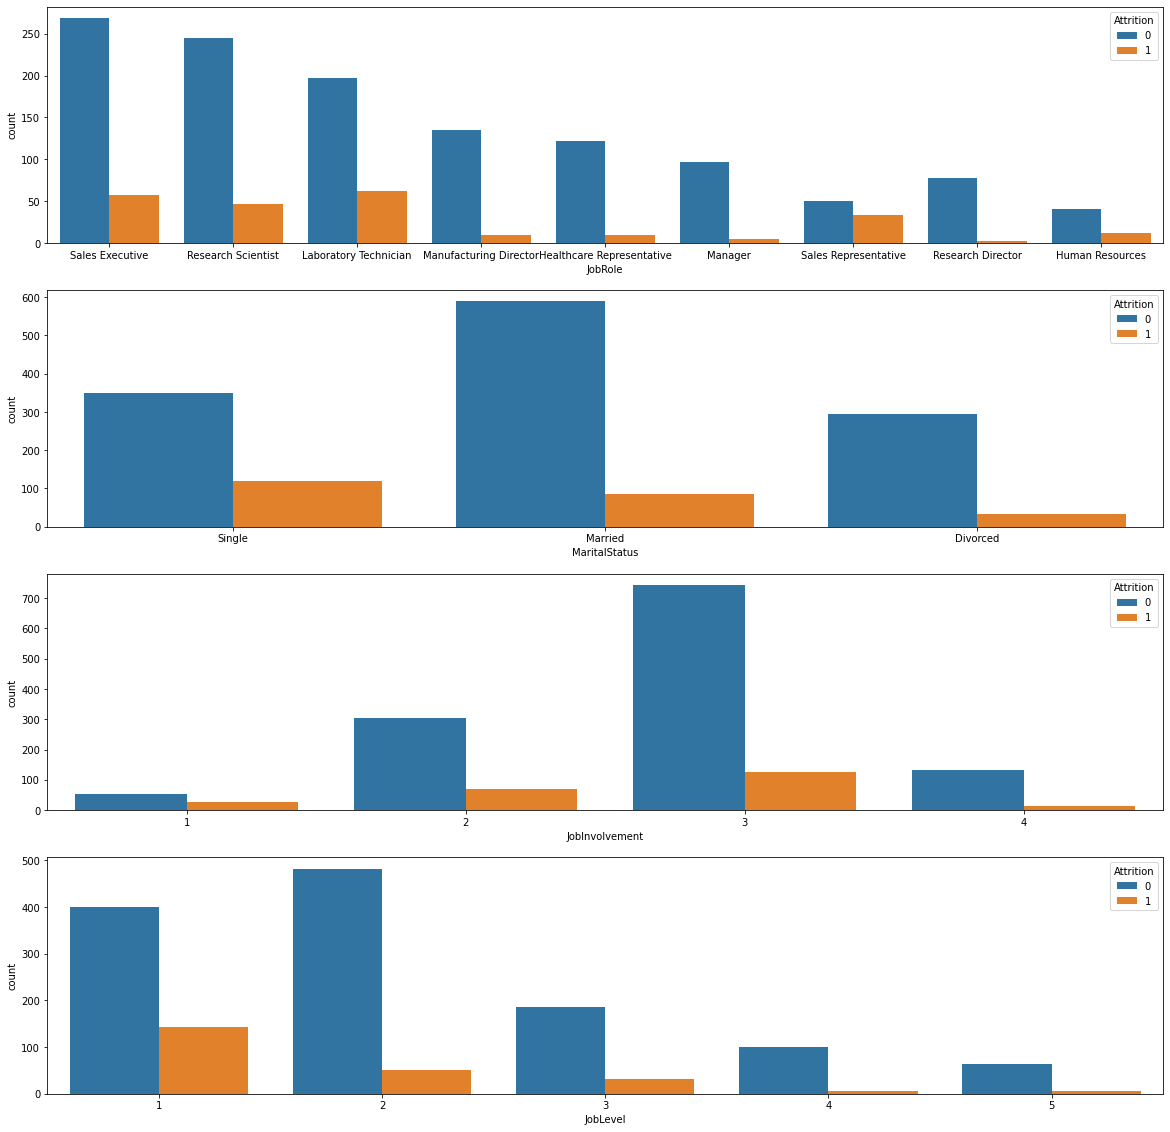

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)


Text(0.5, 0, 'Distance From Home')

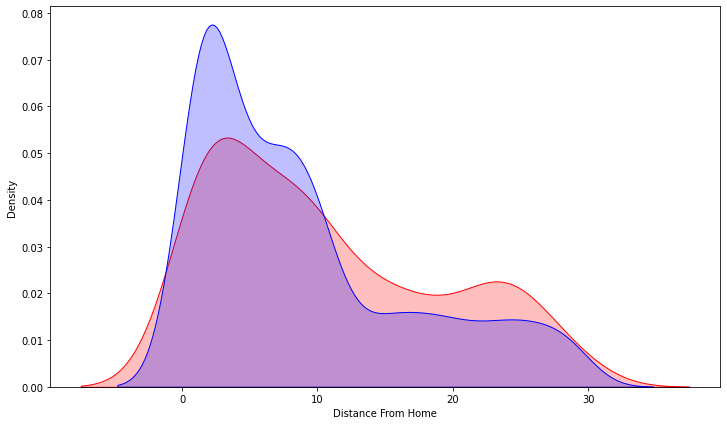

In [ ]:
# visualizing the Probability Density of a continuous variable. 
# KDE Kenrnel Density Estimate describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')


Text(0.5, 0, 'Years With Current Manager')

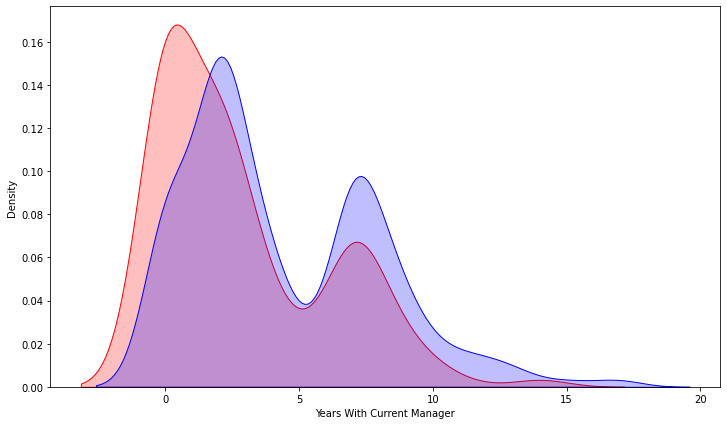

In [ ]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

Text(0.5, 0, 'Total Working Years')

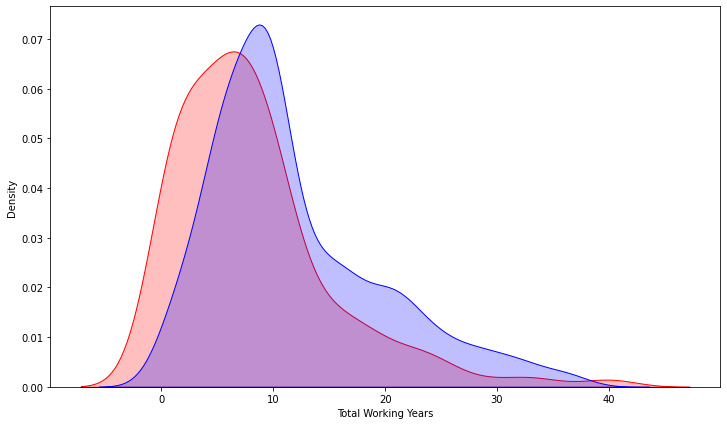

In [ ]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')


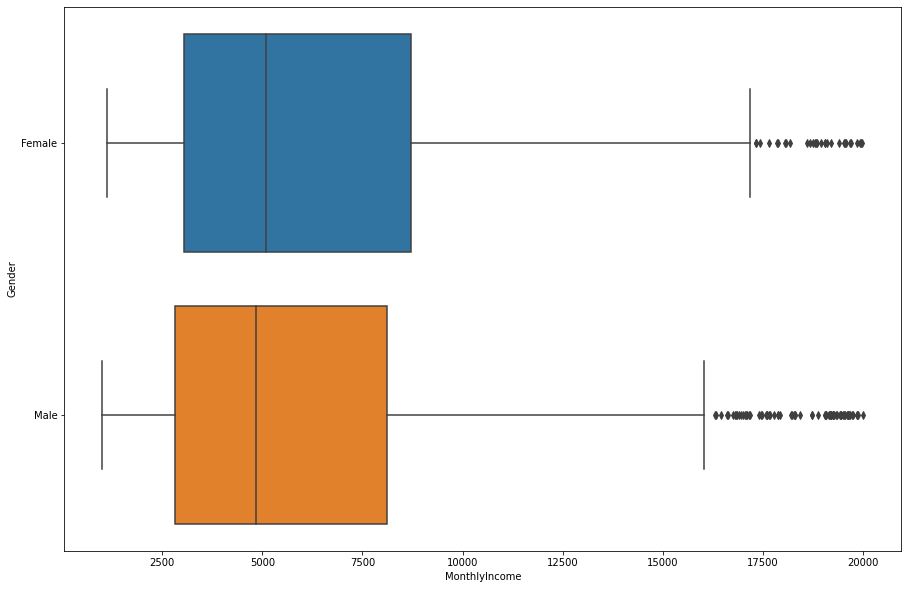

In [ ]:
# Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)

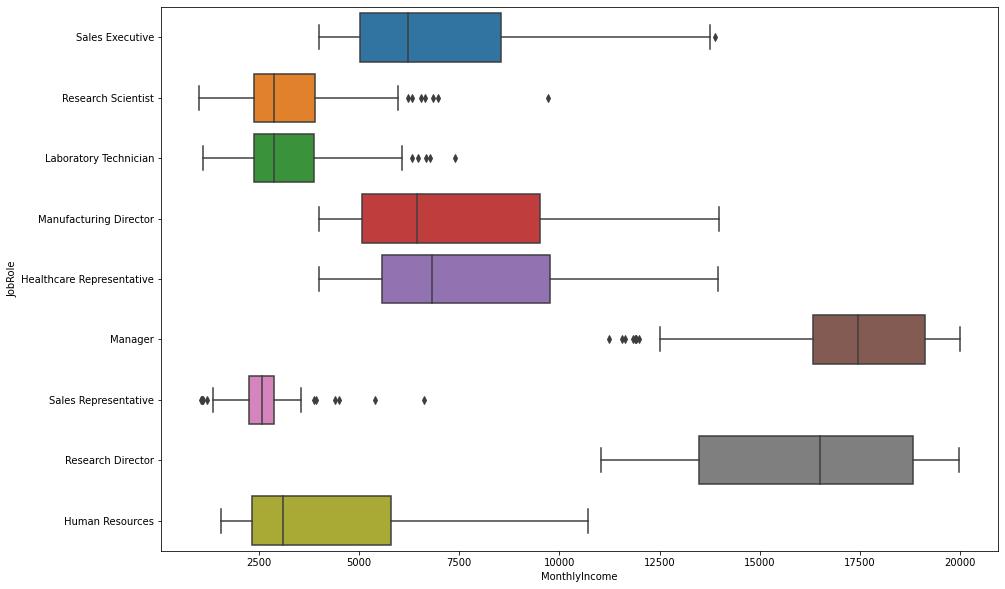

In [ ]:
# income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

# **CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING**

In [ ]:
employee_df.head(3)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0

In [ ]:
#categorical variables
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently                   Sales        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus  
0               Sales Executive        Single  
1            Research Scientist       Married  
2         Laboratory Technician        Single  
3            Research Scientist       Married  
4         Laboratory Technician       Married  
...                         ...           ...  
1465      Laboratory Technician       Married  
1466  Healthcare Representative       Married  
1467     Manufacturing Director       Married  
1468            Sales Executive       Married  
1469      Laboratory Technician       Married  

[1470 rows x 6 columns]

In [ ]:
#fit transform categorical variables into array
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat.shape

(1470, 26)

In [ ]:
#creating dataframe for categorical variables
X_cat = pd.DataFrame(X_cat)
X_cat

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1466  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1467  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1469  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
2     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
4     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1465  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1466  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1467  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1468  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
1469  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[1470 rows x 26 columns]

In [ ]:

X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0           19479                   8         1                 11   
1           24907                   1         0                 23   
2            2396                   6         1                 15   
3           23159                   1         1                 11   
4           16632                   9         0                 12   
...           ...                 ...       ...                ...   
1465        12290                   4         0                 17   
1466        21457                   4         0                 15   
1467         5174                   1         1                 20   
1468        13243                   2         0                 14   
1469        10228                   2         0                 12   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...             

In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1466  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1467  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1469  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25  Age  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   41   
1     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   49   
2     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   37   
3     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   33   
4     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   27   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   36   
1466  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   39   
1467  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   27   
1468  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   49   
1469  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   34   

      DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0          1102                 1          2                        2   
1           279                 8          1                        3   
2          1373                 2          2                        4   
3          1392                 3          4                        4   
4           591                 2          1                        1   
...         ...               ...        ...                      ...   
1465        884                23          2                        3   
1466        613                 6          1                        4   
1467        155                 4          3                        2   
1468       1023                 2          3                        4   
1469        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0           19479                   8         1                 11   
1           24907                   1         0                 23   
2            2396                   6         1                 15   
3           23159                   1         1                 11   
4           16632             

In [ ]:
#fit transforming X_all 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
# X

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
y = employee_df['Attrition']
# y


# **TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape

(1102, 50)

In [ ]:
X_test.shape

(368, 50)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    

    print("RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    # print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(random_state=0, sampling_strategy = 0.4)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_SMOTE) #new shape of the target

Counter({0: 926, 1: 370})

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

In [ ]:
def model_performance_plot(model) : 
    # #conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
    #                     y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
    #                     colorscale = 'Viridis', showscale  = False)

    
                     
                     
                    
                     


    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #plot roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False, 
                        subplot_titles=('Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))
    
    #fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,1)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,1,2)
    fig.append_trace(trace5,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis3"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)



# **LOGISTIC REGRESSION CLASSIFIER**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(penalty="l2",solver="liblinear",C=0.5,max_iter=100)
log_reg.fit(X_train,y_train)

evaluate(log_reg, X_train, X_test, y_train, y_test) #Calling evaluate function to get accuracy and classification report

print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

RESULTS: 
ACCURACY SCORE:
0.8750
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885630   0.740741     0.875    0.813186      0.862401
recall       0.977346   0.338983     0.875    0.658165      0.875000
f1-score     0.929231   0.465116     0.875    0.697174      0.854821
support    309.000000  59.000000     0.875  368.000000    368.000000
--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.887
Test Model accruracy scores: 0.875
--------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



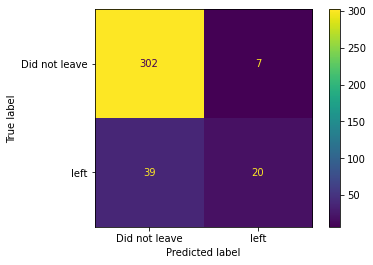

In [ ]:

plot_confusion_matrix(log_reg,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['Did not leave','left'])

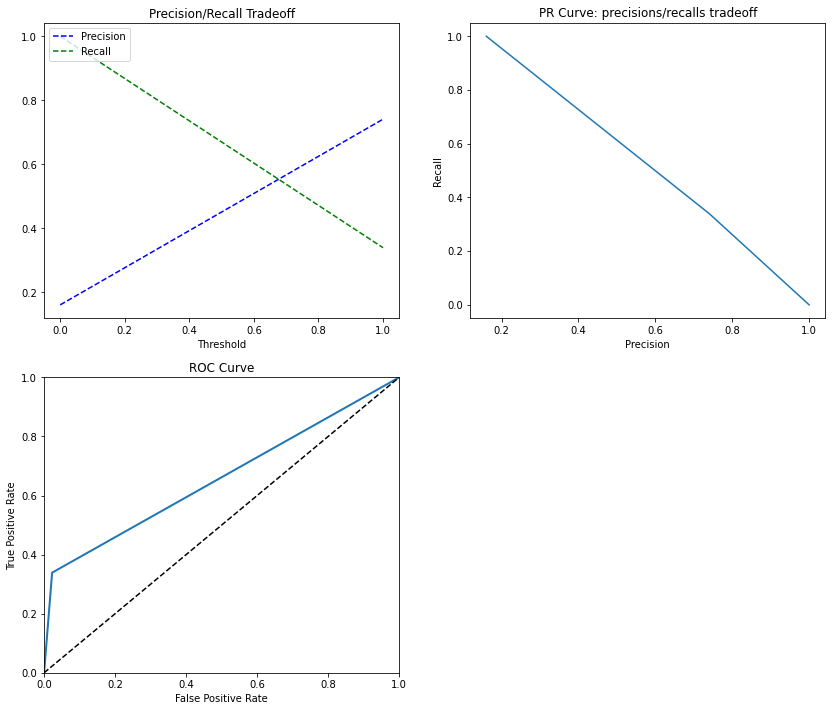

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, log_reg.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict(X_test))
plot_roc_curve(fpr, tpr)

# **SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# evaluate(svm_clf, X_train, X_test, y_train, y_test)

SVC(kernel='linear')

In [ ]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



RESULTS: 
ACCURACY SCORE:
0.8723
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.867978   1.000000  0.872283    0.933989      0.889144
recall       1.000000   0.203390  0.872283    0.601695      0.872283
f1-score     0.929323   0.338028  0.872283    0.633676      0.834523
support    309.000000  59.000000  0.872283  368.000000    368.000000


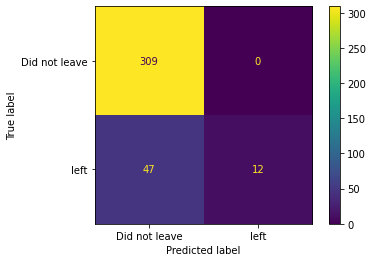

In [ ]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train, y_train)

plot_confusion_matrix(svm_clf,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['Did not leave','left'])


evaluate(svm_clf, X_train, X_test, y_train, y_test)

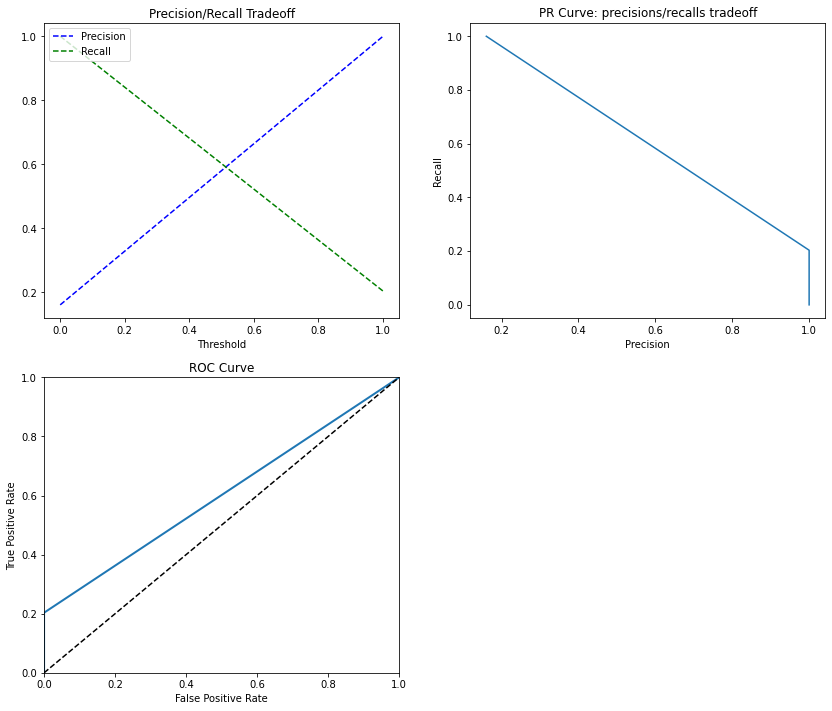

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:

params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.6,
    'max_depth': 8,
    'min_samples_leaf': 10,  
    'max_features': 'sqrt',     
    'random_state' : 0,
    'verbose': 0
}
#  

In [ ]:
random_forest = RandomForestClassifier(**params)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=1000, n_jobs=-1, random_state=0)

In [ ]:

y_pred = random_forest.predict(X_test)
y_score = random_forest.predict_proba(X_test)[:,1]

In [ ]:
model_performance_plot(random_forest)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



With SMOTE

In [ ]:
random_forest.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=1000, n_jobs=-1, random_state=0)

In [ ]:
y_pred = random_forest.predict(X_test)
y_score = random_forest.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



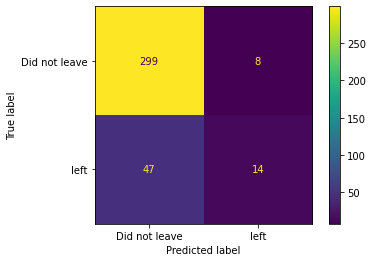

In [ ]:
plot_confusion_matrix(random_forest,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['Did not leave','left'])

In [ ]:
model_performance_plot(random_forest)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
def features_imp(model, cf) : 

    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data     = pd.DataFrame(list(employee_df))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    layout = dict(title =  'Feature Importances random forest')
                    
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [ ]:
features_imp(random_forest, 'features')

# **XG BOOST** 

BUILDING A PRELIMINARY XG BOOST MODEL

In [ ]:
import xgboost as xgb # XGBoost stuff
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during cross validation
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [ ]:
def model_performance_plot(model) : 
    # #conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
    #                     y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
    #                     colorscale = 'Viridis', showscale  = False)

    
                     
                     
                    
                     


    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #plot roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False, 
                        subplot_titles=('Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))
    
    #fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,1)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,1,2)
    fig.append_trace(trace5,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis3"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',
                           eval_metric = 'logloss',
                           seed = 42,
                           use_label_encoder = False)
clf_xgb.fit(X_train,
           y_train,
           verbose = True,
           early_stopping_rounds = 10,
           eval_metric = 'aucpr',
           eval_set = [(X_test,y_test)])

[0]	validation_0-aucpr:0.38183
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.427138
[2]	validation_0-aucpr:0.40752
[3]	validation_0-aucpr:0.414447
[4]	validation_0-aucpr:0.414972
[5]	validation_0-aucpr:0.424162
[6]	validation_0-aucpr:0.432088
[7]	validation_0-aucpr:0.449665
[8]	validation_0-aucpr:0.450122
[9]	validation_0-aucpr:0.448419
[10]	validation_0-aucpr:0.453231
[11]	validation_0-aucpr:0.451957
[12]	validation_0-aucpr:0.455509
[13]	validation_0-aucpr:0.46215
[14]	validation_0-aucpr:0.45983
[15]	validation_0-aucpr:0.465619
[16]	validation_0-aucpr:0.474498
[17]	validation_0-aucpr:0.470331
[18]	validation_0-aucpr:0.469501
[19]	validation_0-aucpr:0.47693
[20]	validation_0-aucpr:0.486512
[21]	validation_0-aucpr:0.486182
[22]	validation_0-aucpr:0.494532
[23]	validation_0-aucpr:0.498672
[24]	validation_0-aucpr:0.495605
[25]	validation_0-aucpr:0.497034
[26]	validation_0-aucpr:0.507367
[27]	validation_0-aucpr:0.499855
[28]	validation_0-aucpr:0

XGBClassifier(eval_metric='logloss', seed=42, use_label_encoder=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



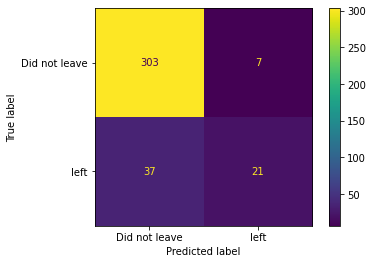

In [ ]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['Did not leave','left'])

In [ ]:
y_pred = clf_xgb.predict(X_test)
y_score = clf_xgb.predict_proba(X_test)[:,1]

model_performance_plot('clf_xgb')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
def features_imp(model, cf) : 

    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data     = pd.DataFrame(list(employee_df))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    layout = dict(title =  'Feature Importances xgb_cfl')
                    
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

# Important features- XGB

In [ ]:
features_imp(clf_xgb, 'features')

# **ARTIFICIAL NEURAL NETWORK(ANN)**

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
#First we need to build a model. For this we use the Sequential model provided by the Keras which is nothing but a linear stack of layers.
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
#Next we need to add the layers to our Sequential model using the add function
#for each layer we need to specify the number of units ( or the number of neurons) and also the activation function used by the neurons.
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#relu for hidden layers and sigmoid(logistic function) for the outer layer to model complex nonlinear relation among the data
#first layer expects the input dimensions in order to know the shape of the input numpy array ,last layer is no of target variables. (yes or no)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
#to compile the given model of neurons  (optimizer )
#minimize the loss ,metric to evaluate performance

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)
#fitting the model to training data, forward or backward propogation

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 0.4637 - accuracy: 0.8385
Epoch 2/100
23/23 [==============================] - 0s 10ms/step - loss: 0.3579 - accuracy: 0.8475
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3269 - accuracy: 0.8684
Epoch 4/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3123 - accuracy: 0.8884
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2563 - accuracy: 0.9038
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2721 - accuracy: 0.8984
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2360 - accuracy: 0.9102
Epoch 8/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2104 - accuracy: 0.9183
Epoch 9/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1688 - accuracy: 0.9319
Epoch 10/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1283 - accuracy: 0.9492


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# y_pred

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

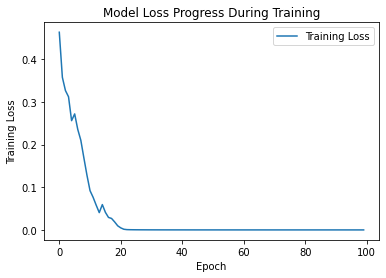

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

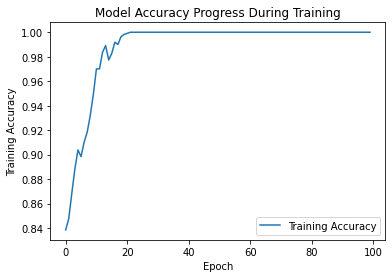

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])
#o increase the model performance of the ANN we need to tune the parameters like the epoch,no of hidden layers, no of neurons used in each layer etc

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[288  21]
 [ 37  22]]


In [ ]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.89      0.93      0.91       309
           1       0.51      0.37      0.43        59

    accuracy                           0.84       368
   macro avg       0.70      0.65      0.67       368
weighted avg       0.83      0.84      0.83       368



# GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_ngb = GaussianNB()
model_ngb.fit(X_train, y_train)
train_Pred = model_ngb.predict(X_train)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_train,train_Pred)

0.6606170598911071

In [ ]:
test_Pred = model_ngb.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,test_Pred)

0.6766304347826086

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



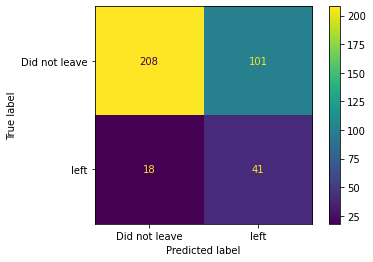

In [ ]:
# metrics.confusion_matrix(y_test,test_Pred)
plot_confusion_matrix(model_ngb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['Did not leave','left'])

In [ ]:
evaluate(model_ngb, X_train, X_test, y_train, y_test)

RESULTS: 
ACCURACY SCORE:
0.6766
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.920354   0.288732   0.67663    0.604543      0.819089
recall       0.673139   0.694915   0.67663    0.684027      0.676630
f1-score     0.777570   0.407960   0.67663    0.592765      0.718312
support    309.000000  59.000000   0.67663  368.000000    368.000000


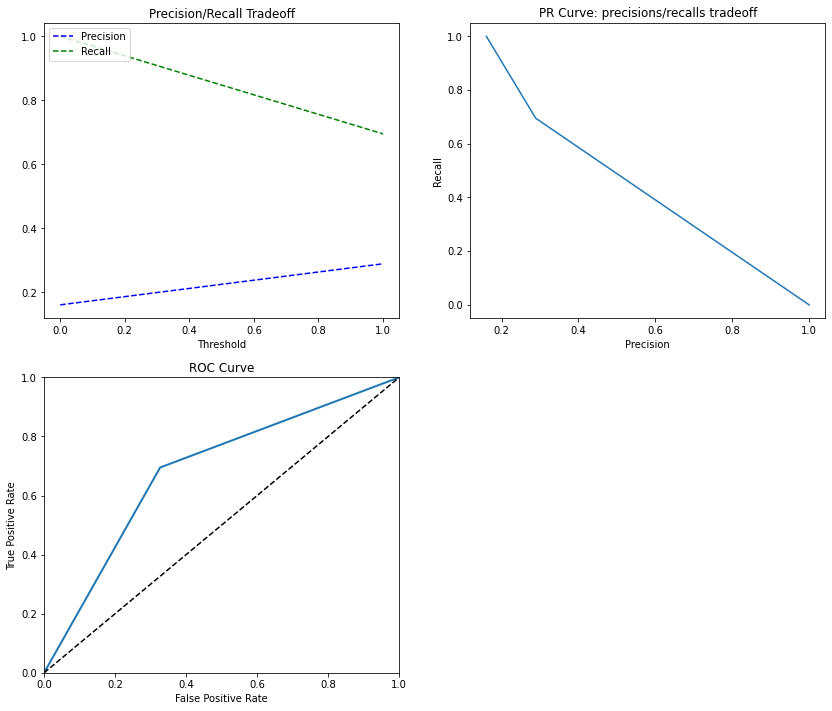

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, model_ngb.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, model_ngb.predict(X_test))
plot_roc_curve(fpr, tpr)

# 🎯 Comparing Models Performance 📊

In [ ]:
ml_models = {
    'Random Forest': random_forest, 
    'XGBoost': clf_xgb, 
    'Logistic Regression': log_reg,
    'Support Vector Machine': svm_clf,
    'Gaussian Naive Bayes': model_ngb
    # 'ANN': model,
    
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.598
XGBOOST                        roc_auc_score: 0.597
LOGISTIC REGRESSION            roc_auc_score: 0.658
SUPPORT VECTOR MACHINE         roc_auc_score: 0.602
GAUSSIAN NAIVE BAYES           roc_auc_score: 0.684


In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, log_reg.predict(X_train)),
        'Test': roc_auc_score(y_test, log_reg.predict(X_test)),
    },
}
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, random_forest.predict(X_train)),
        'Test': roc_auc_score(y_test, random_forest.predict(X_test)),
    }


scores_dict['XG Boost'] = {
        'Train': roc_auc_score(y_train, clf_xgb.predict(X_train)),
        'Test': roc_auc_score(y_test, clf_xgb.predict(X_test)),
    }

scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test)),
    }
scores_dict['Gaussian Naive Bayes'] = {
        'Train': roc_auc_score(y_train, model_ngb.predict(X_train)),
        'Test': roc_auc_score(y_test, model_ngb.predict(X_test)),
    }

In [ ]:
!pip install hvplot


     |████████████████████████████████| 3.1 MB 5.5 MB/s 


In [ ]:
import hvplot
import hvplot.pandas
scores_df = pd.DataFrame(scores_dict)



In [ ]:
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)

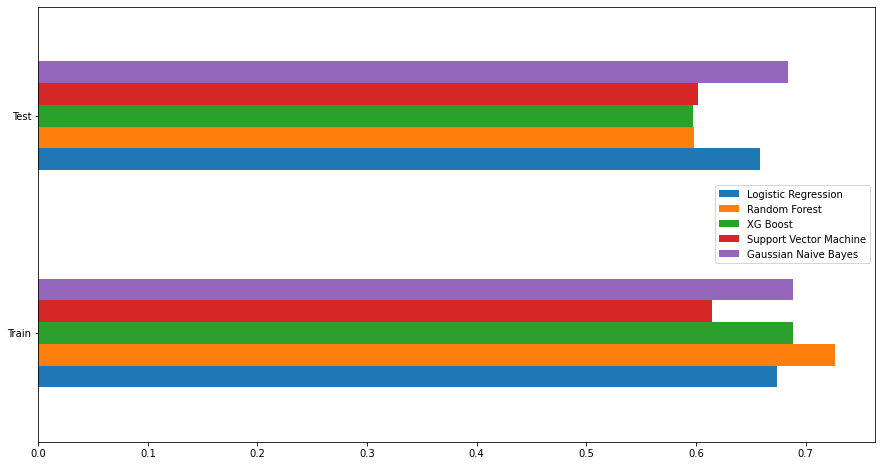

In [ ]:
scores_df.plot(kind='barh', figsize=(15, 8))